In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
from datasets import PointDataset
from models import MLPCNF
from lightning import Trainer

In [3]:
dataset = PointDataset(dim=3)
model = MLPCNF(dim=dataset.dim, hidden_dim=128, depth=4, lr=3e-4)
# model = torch.compile(model)

train_dataloader = dataset.dataloader(
    batch_size=1024,
    batches=256,
    num_workers=32,
    persistent_workers=True,
    pin_memory=True,
)
trainer = Trainer(accelerator="cpu", max_epochs=4, callbacks=[])
trainer.fit(model, train_dataloader)

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/davide_sartor/.conda/envs/torch_env/lib/python3.12/site-packages/lightning/pytorch/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.

  | Name | Type | Params
------------------------------
0 | flow | MLP  | 51.7 K
------------------------------
51.7 K    Trainable params
0         Non-trainable params
51.7 K    Total params
0.207     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=4` reached.


  0%|          | 0/1 [00:00<?, ?it/s]

Pushing data through flow


100%|██████████| 16/16 [00:01<00:00, 11.91it/s]


Running MCMC sampling


100%|██████████| 300/300 [00:00<00:00, 355.19it/s]


Finished initial run, burn-in dropped and starting real run


100%|██████████| 512/512 [00:01<00:00, 352.91it/s]


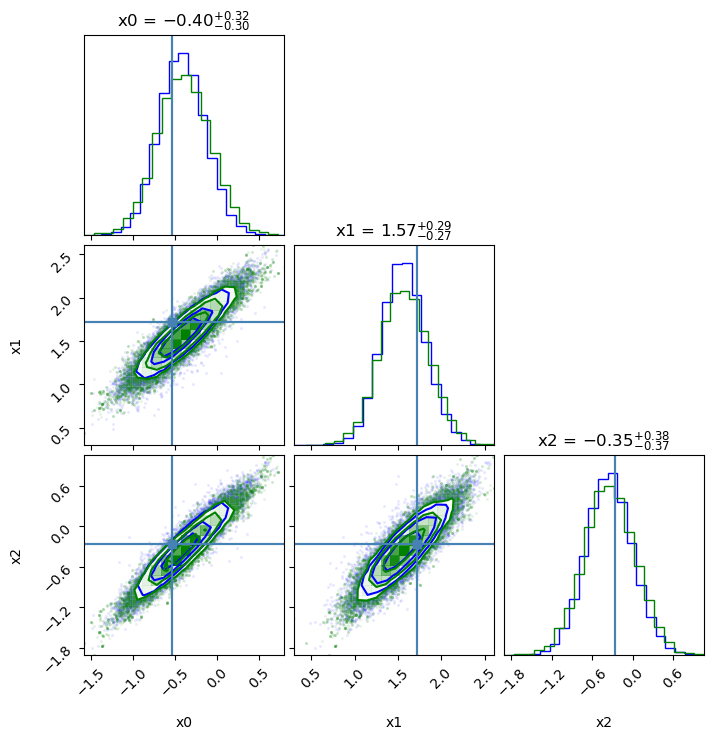

In [4]:
from utils import corner_plot
corner_plot(dataset, model, examples=1, ode_steps=16, samples=32*1024, verbose=True)